In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib

In [2]:
DATA_DIR = '../data/raw'
OUTPUT_COLUMN = 'classification'
MULTI = ['antisemitism_four', 'antisemitism_five', 
         'bbc', 'clothing_topic', 'clothing_rating', 'complaints', 
         'disease', 'movies', 'website',]
BINARY = ['antisemitism_two', 'cyberbullying', 'disaster',]
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'cmr10'
matplotlib.rcParams['font.size'] = 10

In [3]:
def class_pie(names: list[str], output_filename: str) -> None:
    if len(names) >= 4:
        number = len(names) // 3
        fig, ax = plt.subplots(3, number)
        for i in range(3):
            for j in range(number):
                name = names[i * number + j]
                df = pd.read_csv(f'{DATA_DIR}/{name}')
                classifications = list(set(df[OUTPUT_COLUMN]))
                numbers = [len(df[df[OUTPUT_COLUMN] == classification]) for classification in classifications]
                ax[i][j].pie(x=numbers, labeldistance=None)
                ax[i][j].text(0.5, 0, name[:-4].replace("_", " ").title().replace('Bbc', 'BBC'), horizontalalignment='center', verticalalignment='center',
                                 transform = ax[i][j].transAxes)
    else:
        number = len(names)
        fig, ax = plt.subplots(1, number)
        for i, name in enumerate(names):
            df = pd.read_csv(f'{DATA_DIR}/{name}')
            classifications = list(set(df[OUTPUT_COLUMN]))
            numbers = [len(df[df[OUTPUT_COLUMN] == classification]) for classification in classifications]
            ax[i].pie(x=numbers, labeldistance=None)
            ax[i].text(0.5, 0, name[:-4].replace("_", " ").title().replace('Bbc', 'BBC'), horizontalalignment='center', verticalalignment='center',
                                 transform = ax[i].transAxes)
    fig.savefig(f'{output_filename}.pdf', bbox_inches='tight', pad_inches = 0)
    fig.savefig(f'../../paper/italy/{output_filename}.pdf', bbox_inches='tight', pad_inches = 0)

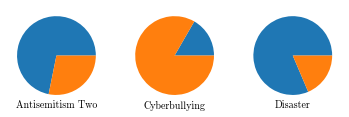

In [4]:
datasets = [file + '.csv' for file in BINARY]
class_pie(datasets, 'bin')

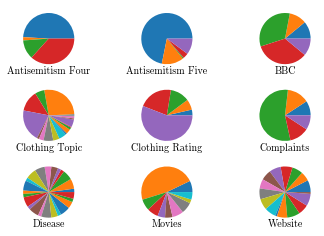

In [5]:
datasets = datasets = [file + '.csv' for file in MULTI]
class_pie(datasets, 'multi')